In [87]:
'''
    Summarize and visualize the data to develop  data intuition

'''
import pandas as pd
import seaborn as sns
import numpy as np
from datetime  import datetime
import matplotlib.pyplot as plt

In [131]:
# read in the data and 

data_file = 'data.csv'
viz_data = pd.read_csv(data_file)


      latitude   longitude                  close_date  close_price
3    67.994791   64.688589  2014-08-17 05:27:01.404296     -14112.0
59   35.205388 -100.247240  2014-08-08 02:16:04.730492     -81436.0
68   36.605590  -98.399810  2014-07-05 07:22:11.681825     -50809.0
134  25.003374  125.529102  2014-07-03 04:55:41.224968     -47828.0
230  36.165156  -98.428840  2014-07-28 06:59:28.750057     -24843.0


In [146]:
viz_data.shape

(88042, 4)

num of negative closing price observations: 2174 out of 88042 total


/Users/cathleen/miniconda2/envs/seinfeld/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/cathleen/miniconda2/envs/seinfeld/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/cathleen/miniconda2/envs/seinfeld/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

     lat_round  long_round  ln_close_price  ln_price
0        -90.0      -180.0       12.409304      12.0
1        -90.0      -170.0       11.858435      12.0
2        -90.0      -160.0       11.940600      12.0
3        -90.0      -150.0       12.049378      12.0
4        -90.0      -140.0       14.611057      15.0
5        -90.0      -130.0       12.102817      12.0
6        -90.0      -120.0       12.825773      13.0
7        -90.0      -110.0       11.962905      12.0
8        -90.0      -100.0       11.916642      12.0
9        -90.0       -90.0       12.122132      12.0
10       -90.0       -80.0       12.063128      12.0
11       -90.0       -70.0       12.951011      13.0
12       -90.0       -60.0       11.782552      12.0
13       -90.0       -50.0       12.185203      12.0
14       -90.0       -40.0       11.993938      12.0
15       -90.0       -30.0       12.353307      12.0
16       -90.0       -20.0       11.638738      12.0
17       -90.0       -10.0       12.949726    

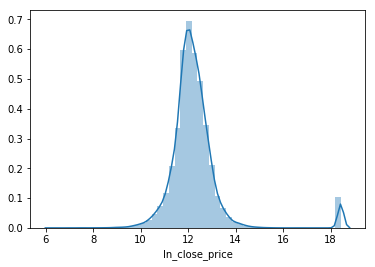

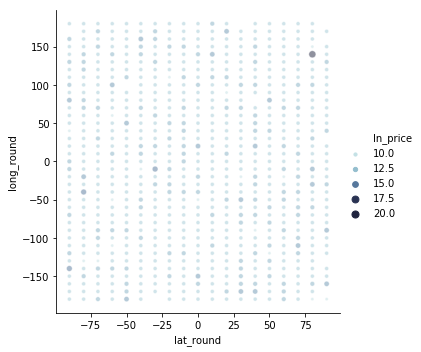

/Users/cathleen/miniconda2/envs/seinfeld/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


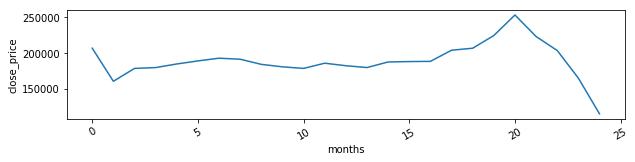

In [172]:
#############
# exploration of data suggests that there are some close prices below 0
# this may be an entry error
# but for this purpose, we should through out that data 

# It also seems like noise has been added to latitude and longitude because some of the
# locations are placed in spots like Antartica 


def getNegPriceCount(var):
    num_zero = np.sum(var <= 0)
    total = len(var)
    print("num of negative closing price observations: %i out of %i total" % (num_zero, total))

    
def getNegPriceCount(data):
    getNegPriceCount(data['close_price'])
    filter_data = data[data['close_price']>0]
    return filter_data


def createLogPrice(data, var):
    var_name = 'ln_' + var
    data[var_name] = np.log(data[var])
    return data
    
def plotLogPriceDist(data, var):
    # plot distribution and create log price
    sns.distplot(data[var])
    data['ln_price'] = np.round(data[var])
    data['lat_round'] = np.round(data["latitude"],-1)
    data['long_round'] = np.round(data["longitude"],-1)
    grouped_data = data.groupby(['lat_round','long_round']).mean()[var].reset_index()
    grouped_data['ln_price'] = np.round(grouped_data[var])
    print(grouped_data)
    cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
    sns.relplot(x = "lat_round", y = "long_round", palette = cmap,
        hue = "ln_price", size = "ln_price", alpha = .5, sizes=(10,50),
        data = grouped_data)
    plt.show()
    return data

def plotOverTime(data):
    # conver the dates string into date format 
    date_ts = data.close_date.apply( 
        lambda x: datetime.strptime(str(x.split('.')[0]), '%Y-%m-%d %H:%M:%S'))
    min_date = min(date_ts)
    data['months'] = date_ts.apply(lambda x: np.round((x - min_date).days/30 ))
    median = data.groupby(['months']).median().reset_index()
    plt.figure(figsize=(10, 2))
    sns.lineplot(x = median['months'], y= median['close_price'])
    plt.xticks(rotation=30)
    
clean_data = filterOutNegative(viz_data)
clean_data = createLogPrice(clean_data, 'close_price')
clean_data = plotLogPriceDist(clean_data, 'ln_close_price')
plotOverTime(clean_data)


In [183]:
pred_file = 'prediction_4.csv'
pred_data = pd.read_csv(pred_file)

def calculateError(pred_data):
    rae = np.abs(pred_data['close_price'] - pred_data['prediction'])/pred_data['close_price']
    pred_data['rel_error'] = rae
    return pred_data


pred_data = calculateError(pred_data)
pred_data.head()
    

,Unnamed: 0,latitude,longitude,close_date,close_price,log_price,date,prediction,rel_error
0,45792,36.161727,-98.123455,2013-12-31 04:47:10,56935.085184,10.949667,2013-12-31,NaN,NaN
1,45806,36.482000,-98.051300,2014-01-01 01:58:30,481654.393156,13.084982,2014-01-01,56935.085184,0.881793
2,45771,36.278290,-98.957650,2014-01-04 01:13:42,169432.247122,12.040208,2014-01-04,269294.739170,0.589395
3,34839,-86.327535,139.708530,2014-01-05 13:29:17,261704.565376,12.474972,2014-01-05,236007.241820,0.098192
4,138,36.727446,-98.414960,2014-01-05 20:11:02,130798.555390,11.781414,2014-01-05,242431.572709,0.853473


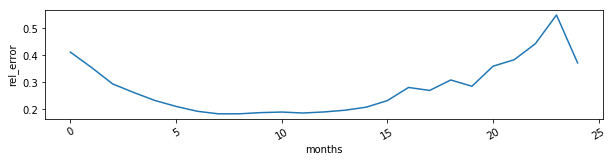

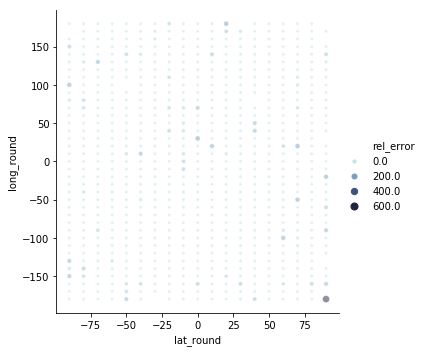

,Unnamed: 0,latitude,longitude,close_date,close_price,log_price,date,prediction,rel_error,months,lat_round,long_round
0,45792,36.161727,-98.123455,2013-12-31 04:47:10,5.693509e+04,10.949667,2013-12-31,NaN,NaN,0.0,40.0,-100.0
1,45806,36.482000,-98.051300,2014-01-01 01:58:30,4.816544e+05,13.084982,2014-01-01,5.693509e+04,0.881793,0.0,40.0,-100.0
2,45771,36.278290,-98.957650,2014-01-04 01:13:42,1.694322e+05,12.040208,2014-01-04,2.692947e+05,0.589395,0.0,40.0,-100.0
3,34839,-86.327535,139.708530,2014-01-05 13:29:17,2.617046e+05,12.474972,2014-01-05,2.360072e+05,0.098192,0.0,-90.0,140.0
4,138,36.727446,-98.414960,2014-01-05 20:11:02,1.307986e+05,11.781414,2014-01-05,2.424316e+05,0.853473,0.0,40.0,-100.0
5,45818,36.421332,-97.990040,2014-01-07 20:19:47,1.744855e+05,12.069597,2014-01-07,2.097051e+05,0.201848,0.0,40.0,-100.0
6,35958,35.868853,-98.940560,2014-01-08 14:34:02,2.651722e+05,12.488135,2014-01-08,2.097051e+05,0.209174,0.0,40.0,-100.0
7,31915,36.252380,-98.114070,2014-01-09 13:01:38,4.157435e+05,12.937824,2014-01-09,2.109684e+05,0.492552,0.0,40.0,-100.0
8,75,36.340636,-98.049045,2014-01-09 19:03:05,2.958189e+05,12.597503,2014-01-09,2.822046e+05,0.046022,0.0,40.0,-100.0
9,45813,36.270648,-98.503130,2014-01-10 06:55:27,1.391519e+05,11.843322,2014-01-10,2.344824e+05,0.685082,0.0,40.0,-100.0


In [184]:
def plotOverTime(data):
    # conver the dates string into date format 
    date_ts = data.close_date.apply( 
        lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'))
    min_date = min(date_ts)
    data['months'] = date_ts.apply(lambda x: np.round((x - min_date).days/30 ))
    median_error = data.groupby(['months']).median().reset_index()
    plt.figure(figsize=(10, 2))
    sns.lineplot(x = median_error['months'], y= median_error['rel_error'])
    plt.xticks(rotation=30)
    
def plotSpatialError(data, var):
    # plot distribution and create log price
    data['lat_round'] = np.round(data["latitude"],-1)
    data['long_round'] = np.round(data["longitude"],-1)
    grouped_data = data.groupby(['lat_round','long_round']).median()[var].reset_index()
    cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
    sns.relplot(x = "lat_round", y = "long_round", palette = cmap,
        hue = "rel_error", size = "rel_error", alpha = .5, sizes=(10,50),
        data = grouped_data)
    plt.show()
    return data

plotOverTime(pred_data)
plotSpatialError(pred_data, 'rel_error')

In [175]:
max(pred_data.close_date)

'2016-01-05 21:09:11'